### Students Performance Indicator 

Life Cycle of Machine learning Project

- understanding problem statement
- Data collection
- data checks and perform
- EDA 
- Data pre-processing
- Model Training
- Choose best Model




### 1 . Problem statement 

- This project understands how student's performance (test score ) is affected by other variables such as Gender, Ethnicity, Parental level of education, 
Lunch and test preparation course

### 2. Data collection: 
- Data contains 8 columns and 10000 rows 


### 2.1 Import data and required packages

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
# import CSV 
df = pd.read_csv(r'data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3. Data Checks 
- Check missing values
- check duplicate values
- check data types
- check number of unique values in each column 
- check statestics of datasets
- check various categoris are present in diffent categorical columns


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.1 Exploring data 


In [27]:

print("Categories in gender variable : ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity:  ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in parental_level_of_education: ",end=" ")
print(df['parental_level_of_education'].unique())

print('Categories in lunch: ',end=" ")
print(df['lunch'].unique())

print('Categories in test_preparation_course: ',end = " ")
print(df['test_preparation_course'].unique())


Categories in gender variable :  ['female' 'male']
Categories in race_ethnicity:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course:  ['none' 'completed']


In [37]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print("we have {} Numeric features, which are : \n{}".format(len(numeric_features),numeric_features))
print("we have {} categorical features which are : \n{} ".format(len(categorical_features),categorical_features))

we have 3 Numeric features, which are : 
['math_score', 'reading_score', 'writing_score']
we have 5 categorical features which are : 
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


### 3.2 Adding column for "Total Score" and "Average"

In [50]:
df["Total_score"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = round(df["Total_score"]/ 3,2)

In [51]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [64]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()


print(f"Number of students with full marks in maths: {math_full}")

print(f"Number of students with full marks in writing: {writing_full}")

print(f"Number of students with full marks in reading: {reading_full}")

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [65]:
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()


print(f"Number of students with less than 20 marks in maths: {math_less_20}")

print(f"Number of students with less than 20 marks in writing: {writing_less_20}")

print(f"Number of students with less than 20 marks in reading: {reading_less_20}")

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


* Insights

    - From above value we get that students have performed worst in maths
    - best in reading.

### 4. Data Visualization 

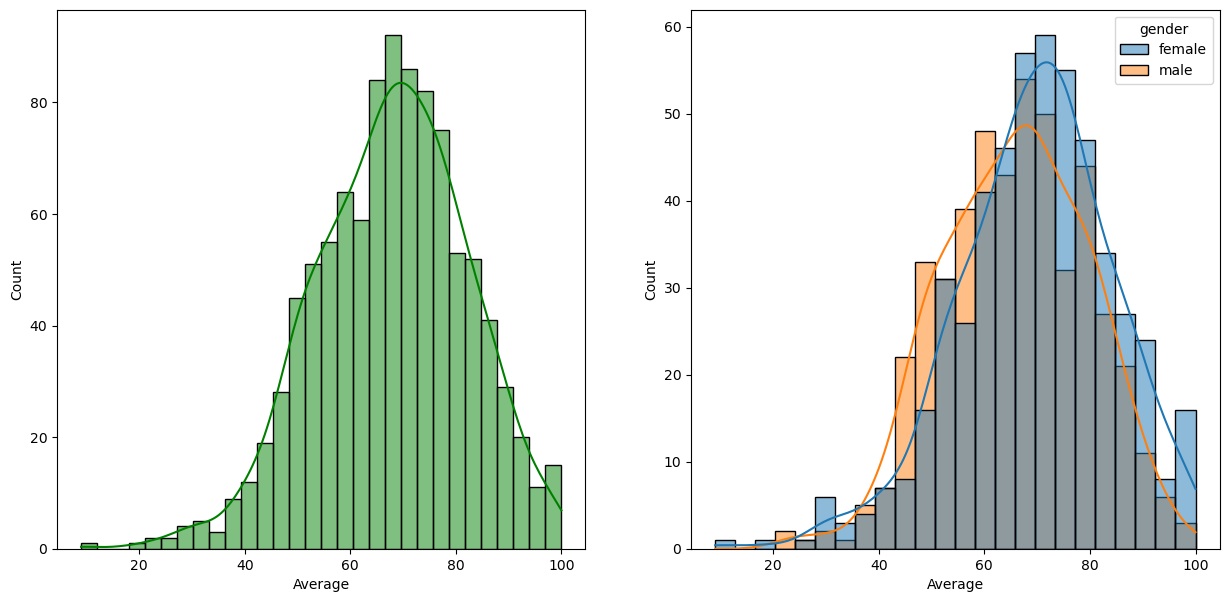

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

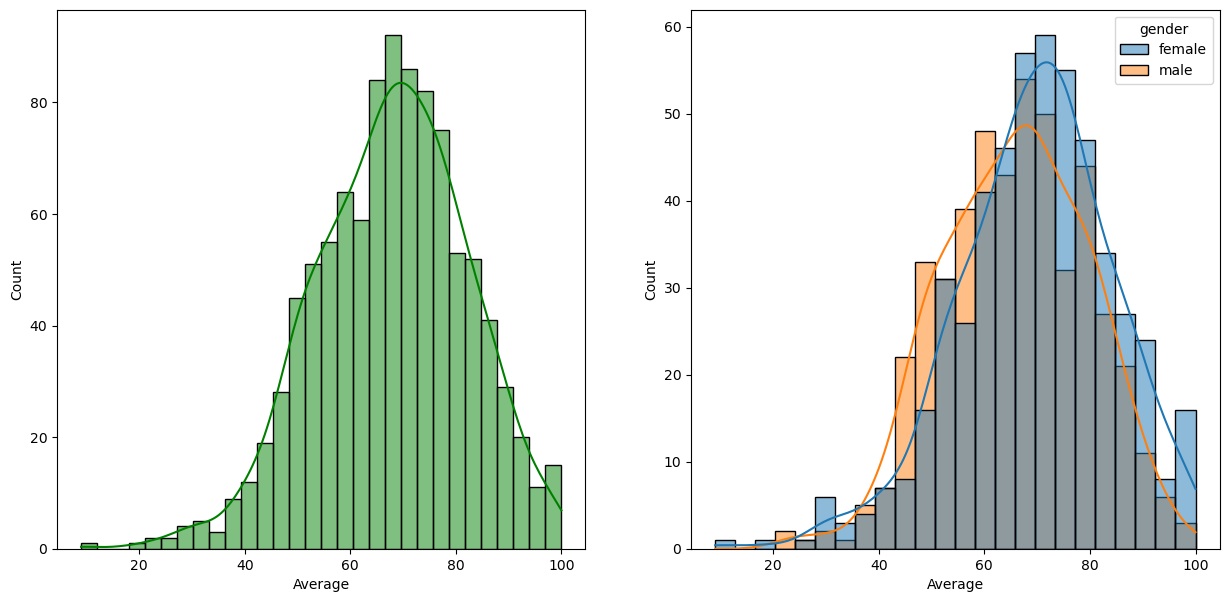

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

* Insights: 
    - Female students tends to perform well. 

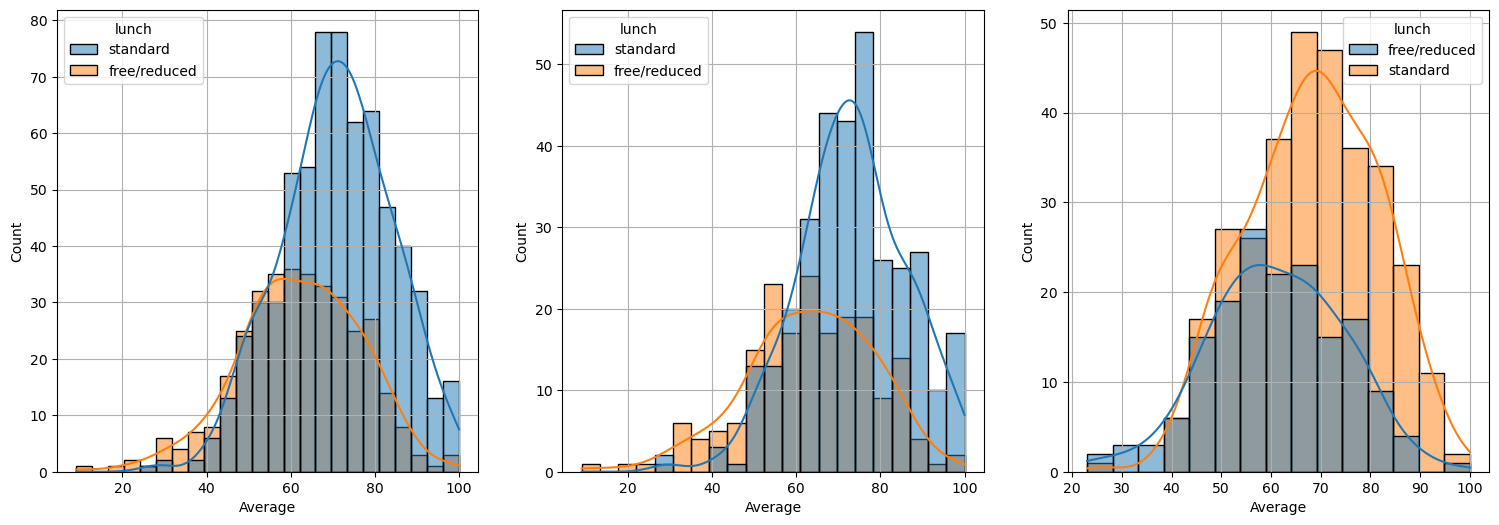

In [97]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.grid()
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.grid()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.grid()
plt.show()


#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

<AxesSubplot:xlabel='Average', ylabel='Count'>

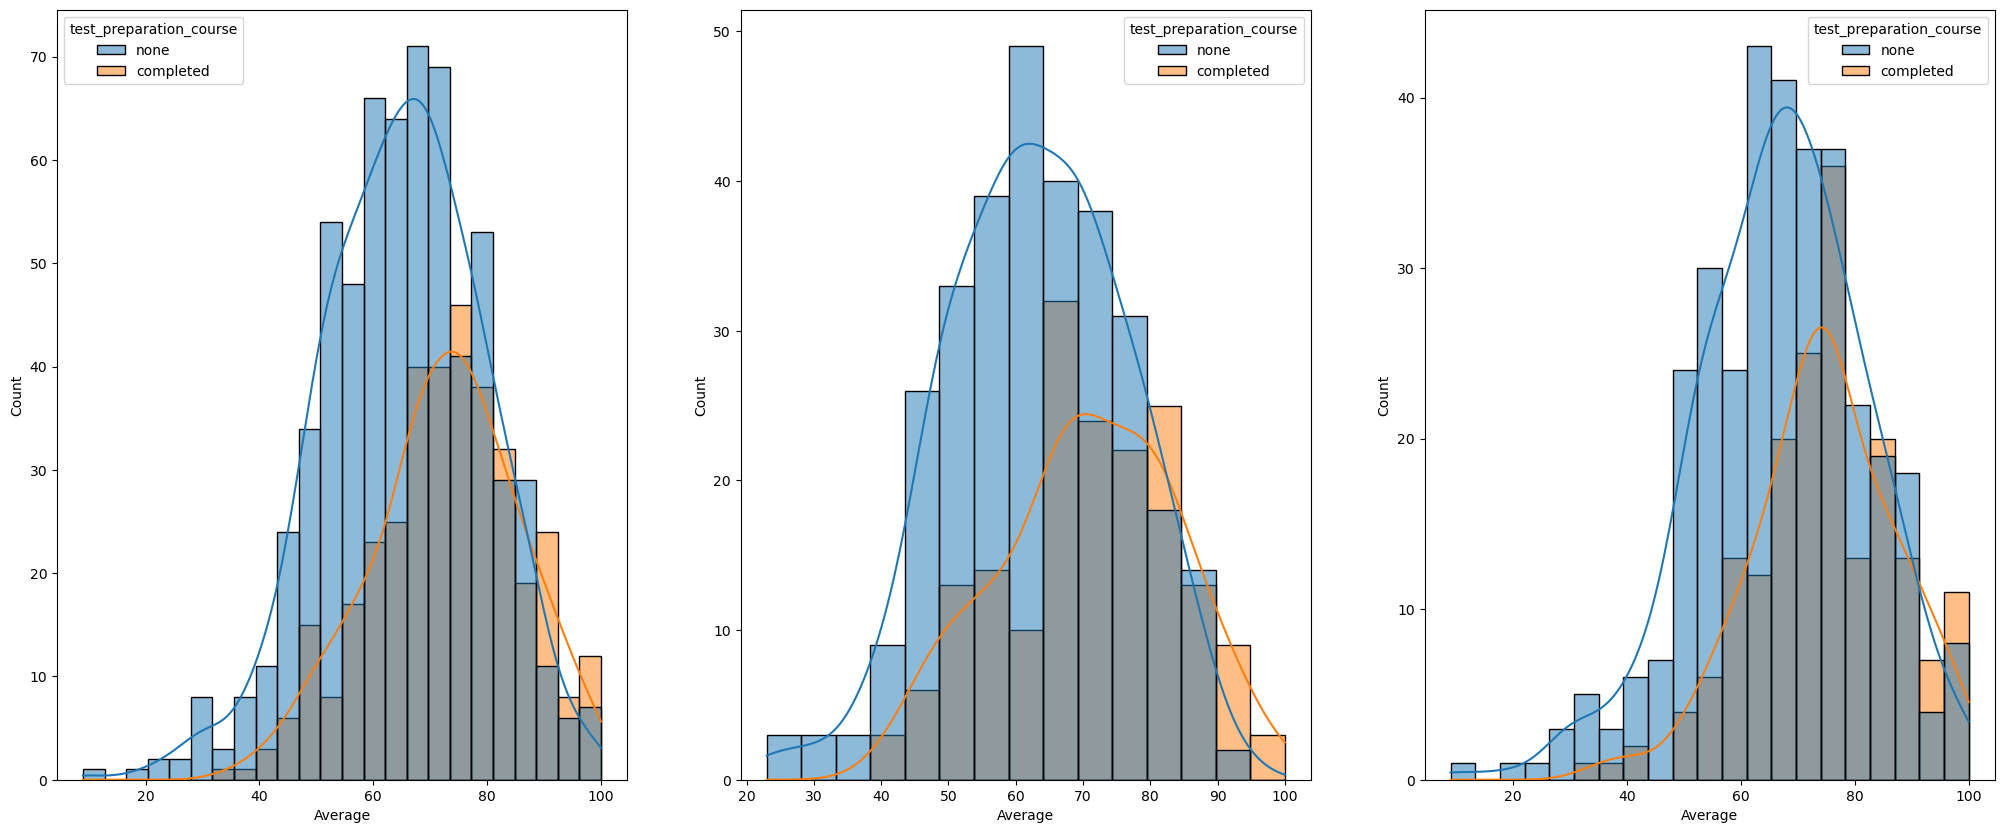

In [111]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x='Average',hue='test_preparation_course',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='Average',hue='test_preparation_course',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='Average',hue='test_preparation_course',kde=True)

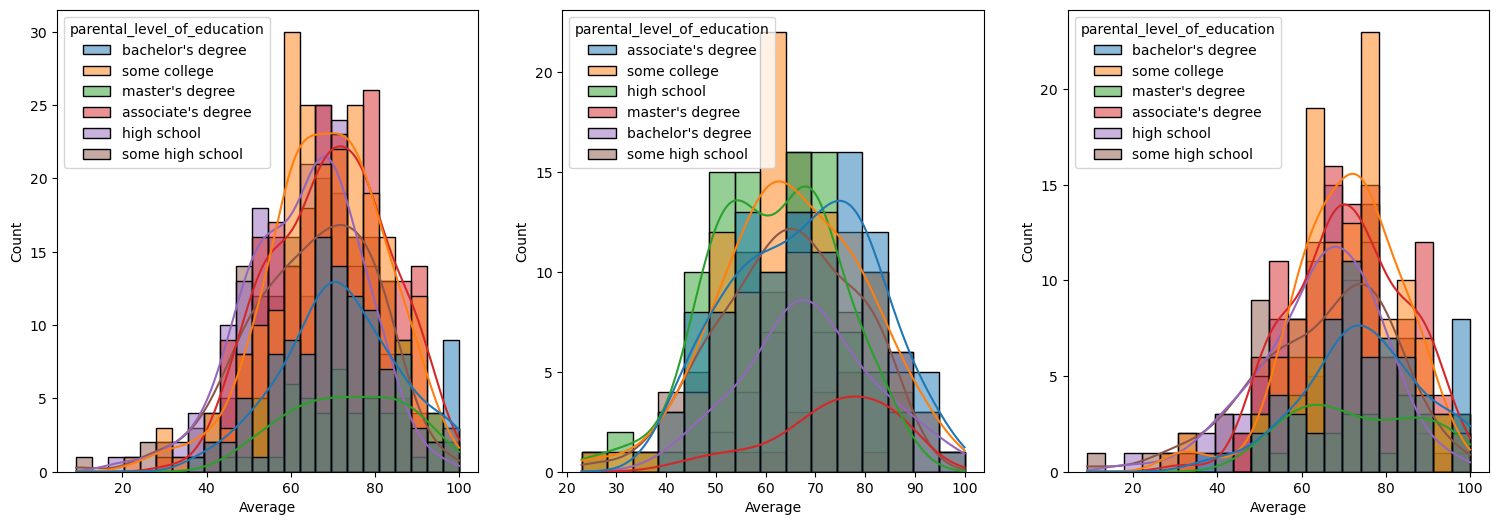

In [115]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.